## Bioinformatics

This notebook features a small example of how to obtain sequence data, how to process it and how to potentially interpret it.

The most frequent language used to process data is Python and especially the library [Biopython](https://biopython.org/) is really popular!

### Standards

Sequencing data comes in a variets of standards due to increasing device capabilities which allowed inclusion of metadata or different needs.

<br>
<br>

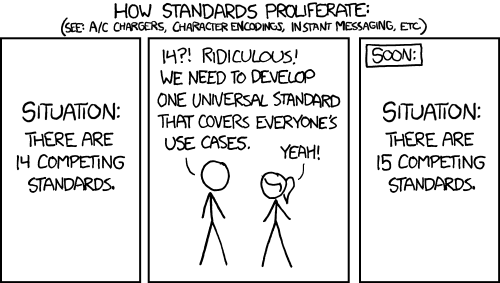

<br><br>

In my experience the most relevant are:

- FASTA
- FASTQ
- GenBank
- (SAM/BAM)


We will only use FASTA or GENBANK data

##### FASTA

FASTA is a simple text-based format that always has an identifier line containing random information about the sequence (indicated with a >) and a second line containing the nucleotide or protein sequence.
They look like this:

>\>SARSCOV2 - 19 FEB 2019 - Random information blabla
ACTGTATACTGTCAGTCGTATATCGTACGTCAGTGTCAGTCGTACGTAGTCGTACGTACGTAGCTGTAC
ATCTGACGTACGTAGTCTAGCTACGTATCGGTACGTACGTACGTATGCTACGTACTGTAGCTGACTGAC
ATTATCTACTCTACGTATCATCGACGAGCGCGCGCGCCCTACTATCGTACGTGCTGTCGTACGTACGTA

Typically file endings include .fasta .fna .fa, but it's essentially just a text file.


##### FASTQ

FASTQ is an extension to the classic FASTA format which contains a Q for Quality assesment of the sequence read. This means that each nucleotide has a quality score assigned, meaning the "certainty" of the machine that processed and read it which is nice information to have when comparing or analyzing large amounts of sequences.
It looks like this:

>\@Sequence_information <br>
GATTTGGGGTTCAAAGCAGTATCGATCAAATAGTAAATCCATTTGTTCAACTCACAGTTT <br>
\+ <br>
!''*((((\*\*\*+))%%%++)(%%%%).1\*\*\*-+*''))\*\*55CCF>>>>>>CCCCCCC65 <br>

##### GENBANK

The GenBank standard contains lots of information and annotations about the data contained, making it a rather large format. The example shown in the medium post from the NCBI page displays the GenBank standard per default. It looks like this:

https://www.ncbi.nlm.nih.gov/nuccore/1798174254


## Sequence alignment

To effectively compare similar sequences, we need to align them. This means that we arrange the sequences in such a way that they have the best overlap or the most matching nucleotides. Sequence alignments and algorithms are a topic for themselves [(enjoy reading)](https://en.wikipedia.org/wiki/Sequence_alignment) as depending on how you calculate distances or similarities there are MANY different outcomes.

We will use a standard configuration provided in a tool called MUSCLE which tends to yield very good results for short sequence alignments.

Enough theory, let's dive in!

To start we download the FASTA representation of the NCBI page

Visit:

https://www.ncbi.nlm.nih.gov/nuccore/1798174254

Click on "Send To" indicated in red, select file and choose FASTA and Create File!

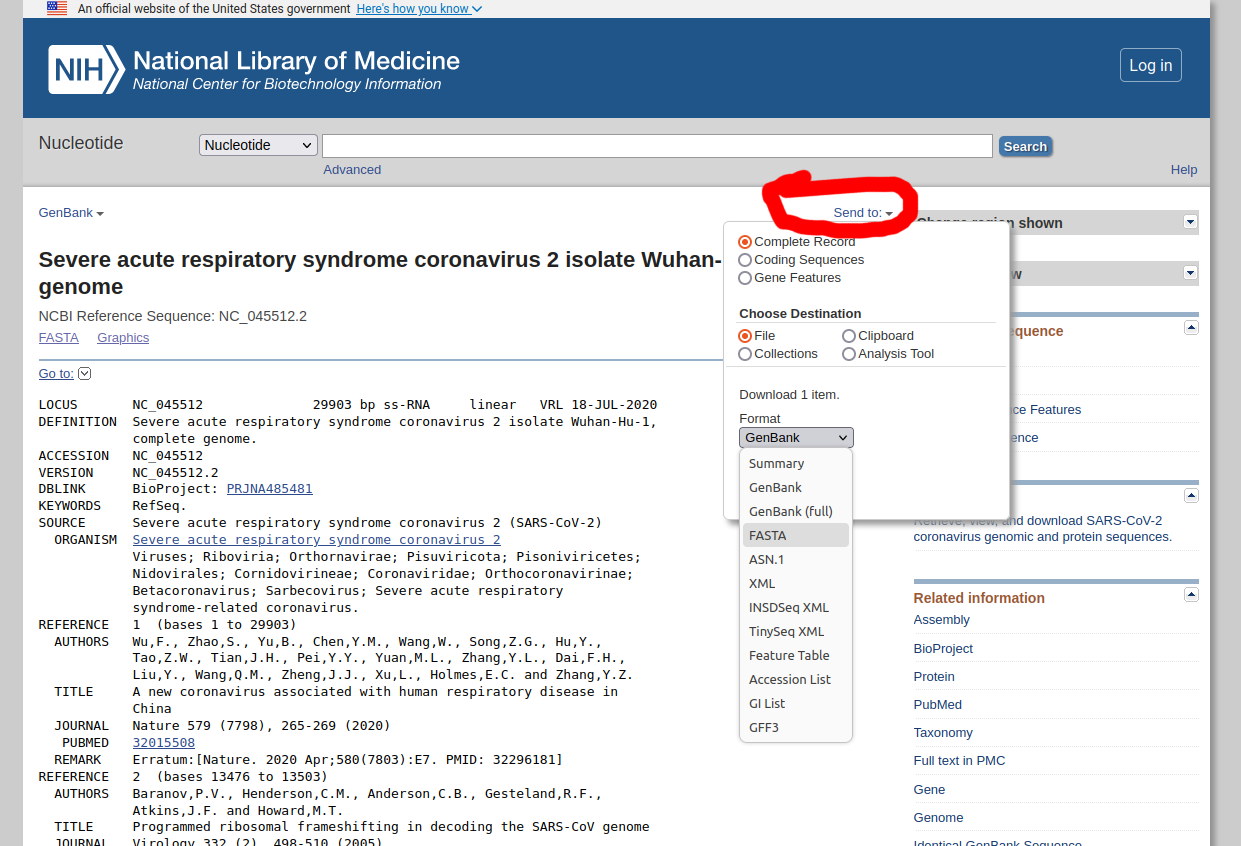

Open the file and see that it indeed is a FASTA file!
Let's go!


In [1]:
# Extracting the desired subsequence of the spike protein of the SARS-COV-2 genome
# --------------
# We know that the spike sequence is at location 21563..25384 (indicated in the genbank file when searching for "spike")
# Usually we do not have perfectly annotated genbank sequences so slicing and manipulating of sequence is done frequently.
#
# --------------

# Imports
# --------------
# biopython
from Bio import SeqIO

filepath = 'data/sequence.fasta'

# Python is indexed from zero and the nucleotide sequence starts at 1 so we need to subtract 1 to get the correct index
start_index = 21562
end_index = 25384 # we have to include +1 character as python omits the end index

# iterate over records (we only have one fasta within the file so it's not needed but usually you have fasta files 
# containing 100s of records)
for record in SeqIO.parse(filepath, 'fasta'):
    subsequence = record.seq[start_index:end_index]
    print("ID: ", record.id)
    print("Subsequence: ", subsequence)
    


ID:  NC_045512.2
Subsequence:  ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTGTTAATCTTACAACCAGAACTCAATTACCCCCTGCATACACTAATTCTTTCACACGTGGTGTTTATTACCCTGACAAAGTTTTCAGATCCTCAGTTTTACATTCAACTCAGGACTTGTTCTTACCTTTCTTTTCCAATGTTACTTGGTTCCATGCTATACATGTCTCTGGGACCAATGGTACTAAGAGGTTTGATAACCCTGTCCTACCATTTAATGATGGTGTTTATTTTGCTTCCACTGAGAAGTCTAACATAATAAGAGGCTGGATTTTTGGTACTACTTTAGATTCGAAGACCCAGTCCCTACTTATTGTTAATAACGCTACTAATGTTGTTATTAAAGTCTGTGAATTTCAATTTTGTAATGATCCATTTTTGGGTGTTTATTACCACAAAAACAACAAAAGTTGGATGGAAAGTGAGTTCAGAGTTTATTCTAGTGCGAATAATTGCACTTTTGAATATGTCTCTCAGCCTTTTCTTATGGACCTTGAAGGAAAACAGGGTAATTTCAAAAATCTTAGGGAATTTGTGTTTAAGAATATTGATGGTTATTTTAAAATATATTCTAAGCACACGCCTATTAATTTAGTGCGTGATCTCCCTCAGGGTTTTTCGGCTTTAGAACCATTGGTAGATTTGCCAATAGGTATTAACATCACTAGGTTTCAAACTTTACTTGCTTTACATAGAAGTTATTTGACTCCTGGTGATTCTTCTTCAGGTTGGACAGCTGGTGCTGCAGCTTATTATGTGGGTTATCTTCAACCTAGGACTTTTCTATTAAAATATAATGAAAATGGAACCATTACAGATGCTGTAGACTGTGCACTTGACCCTCTCTCAGAAACAAAGTGTACGTTGAAATCCTTCACTGTAGAAAAAGGAATCTATCAAACTTCTAACTTTAGAGTCCAACCAACA

In [2]:
# This is the whole sequence of the spike protein. Now we translate it to protein
# As we use biopython we can simply use the .translate() method on the sequence.
# To control we can return the mRNA string as well to see how the translate method works
mrna_sequence = subsequence.transcribe()
print("mRNA sequence:")
print(mrna_sequence)

protein_sequence = subsequence.translate()
print("Protein Sequence:")
print(protein_sequence)

mRNA sequence:
AUGUUUGUUUUUCUUGUUUUAUUGCCACUAGUCUCUAGUCAGUGUGUUAAUCUUACAACCAGAACUCAAUUACCCCCUGCAUACACUAAUUCUUUCACACGUGGUGUUUAUUACCCUGACAAAGUUUUCAGAUCCUCAGUUUUACAUUCAACUCAGGACUUGUUCUUACCUUUCUUUUCCAAUGUUACUUGGUUCCAUGCUAUACAUGUCUCUGGGACCAAUGGUACUAAGAGGUUUGAUAACCCUGUCCUACCAUUUAAUGAUGGUGUUUAUUUUGCUUCCACUGAGAAGUCUAACAUAAUAAGAGGCUGGAUUUUUGGUACUACUUUAGAUUCGAAGACCCAGUCCCUACUUAUUGUUAAUAACGCUACUAAUGUUGUUAUUAAAGUCUGUGAAUUUCAAUUUUGUAAUGAUCCAUUUUUGGGUGUUUAUUACCACAAAAACAACAAAAGUUGGAUGGAAAGUGAGUUCAGAGUUUAUUCUAGUGCGAAUAAUUGCACUUUUGAAUAUGUCUCUCAGCCUUUUCUUAUGGACCUUGAAGGAAAACAGGGUAAUUUCAAAAAUCUUAGGGAAUUUGUGUUUAAGAAUAUUGAUGGUUAUUUUAAAAUAUAUUCUAAGCACACGCCUAUUAAUUUAGUGCGUGAUCUCCCUCAGGGUUUUUCGGCUUUAGAACCAUUGGUAGAUUUGCCAAUAGGUAUUAACAUCACUAGGUUUCAAACUUUACUUGCUUUACAUAGAAGUUAUUUGACUCCUGGUGAUUCUUCUUCAGGUUGGACAGCUGGUGCUGCAGCUUAUUAUGUGGGUUAUCUUCAACCUAGGACUUUUCUAUUAAAAUAUAAUGAAAAUGGAACCAUUACAGAUGCUGUAGACUGUGCACUUGACCCUCUCUCAGAAACAAAGUGUACGUUGAAAUCCUUCACUGUAGAAAAAGGAAUCUAUCAAACUUCUAACUUUAGAGUCCAACCAACAGAAUCUAUUGUUAGAU

In [3]:
# We can now compare this result to the result from the annotated genbank feature to see if we're doing the right thing

# We download the genbank record from ncbi (send to - file - genbank from the website) and parse for the desired feature

inFile = 'data/sequence.gb'

feature_type = 'CDS'
feature_name = 'surface glycoprotein'

# As we are searching for the well annotated and defined spike protein we can search for 
# all CDS (Coding sequences - the sequences that are translated) and check if its the "surface glycoprotein". 

# iterate over each record in file
for record in SeqIO.parse(inFile, format='gb'):
    # iterate over each feature and check if its a CDS which we want to extract and check if there is a "surface glycoprotein" within the products generated from this sequence
    for feature in record.features:
        if feature.type == feature_type and 'product' in feature.qualifiers:
            if feature_name in feature.qualifiers['product']:
                feature_seq = feature.extract(record.seq)
                print("ID:", record.id)
                print("Feature Sequence:", feature_seq)
                
                # This shows us the from genbank extracted sequence, now we translate it and compare it to our previous code
                translatedSeq = feature_seq.translate()
                print("Translated Sequence:", translatedSeq)
                
                print("\n\nCheck if it is the same - True or False\n")
                
                print(translatedSeq == protein_sequence)
                print("\nyay this works")


ID: NC_045512.2
Feature Sequence: ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTGTTAATCTTACAACCAGAACTCAATTACCCCCTGCATACACTAATTCTTTCACACGTGGTGTTTATTACCCTGACAAAGTTTTCAGATCCTCAGTTTTACATTCAACTCAGGACTTGTTCTTACCTTTCTTTTCCAATGTTACTTGGTTCCATGCTATACATGTCTCTGGGACCAATGGTACTAAGAGGTTTGATAACCCTGTCCTACCATTTAATGATGGTGTTTATTTTGCTTCCACTGAGAAGTCTAACATAATAAGAGGCTGGATTTTTGGTACTACTTTAGATTCGAAGACCCAGTCCCTACTTATTGTTAATAACGCTACTAATGTTGTTATTAAAGTCTGTGAATTTCAATTTTGTAATGATCCATTTTTGGGTGTTTATTACCACAAAAACAACAAAAGTTGGATGGAAAGTGAGTTCAGAGTTTATTCTAGTGCGAATAATTGCACTTTTGAATATGTCTCTCAGCCTTTTCTTATGGACCTTGAAGGAAAACAGGGTAATTTCAAAAATCTTAGGGAATTTGTGTTTAAGAATATTGATGGTTATTTTAAAATATATTCTAAGCACACGCCTATTAATTTAGTGCGTGATCTCCCTCAGGGTTTTTCGGCTTTAGAACCATTGGTAGATTTGCCAATAGGTATTAACATCACTAGGTTTCAAACTTTACTTGCTTTACATAGAAGTTATTTGACTCCTGGTGATTCTTCTTCAGGTTGGACAGCTGGTGCTGCAGCTTATTATGTGGGTTATCTTCAACCTAGGACTTTTCTATTAAAATATAATGAAAATGGAACCATTACAGATGCTGTAGACTGTGCACTTGACCCTCTCTCAGAAACAAAGTGTACGTTGAAATCCTTCACTGTAGAAAAAGGAATCTATCAAACTTCTAACTTTAGAGTCCAACCA

## As this was not THAT exciting, we're moving to alignments

### Multiple Sequence Alignment (MSA)

MSAs are the bread and butter of analyzing biological data. MSAs allows to find [conserved sequences](https://en.wikipedia.org/wiki/Conserved_sequence) (DNA regions that are pretty much always the same in each individual) and more variable ones.

We will use a tool called [MUSCLE](https://www.drive5.com/muscle/manual/index.html) which can easily be installed on your unix system as follows:

(I have the software provided in the git repo so you just need to set it to executable with the chmod command or you can do it yourself)

Download the linux file
https://github.com/rcedgar/muscle/releases/tag/5.1.0

Put it somewhere you like or within PATH and rename it or use an alias
(I put it in the base directory called "notebookKey" which is provided in the git repo)

make it executable

- chmod +x muscle

and we can use it from our command line by invoking 

muscle

which gives us a short description of the functionality:

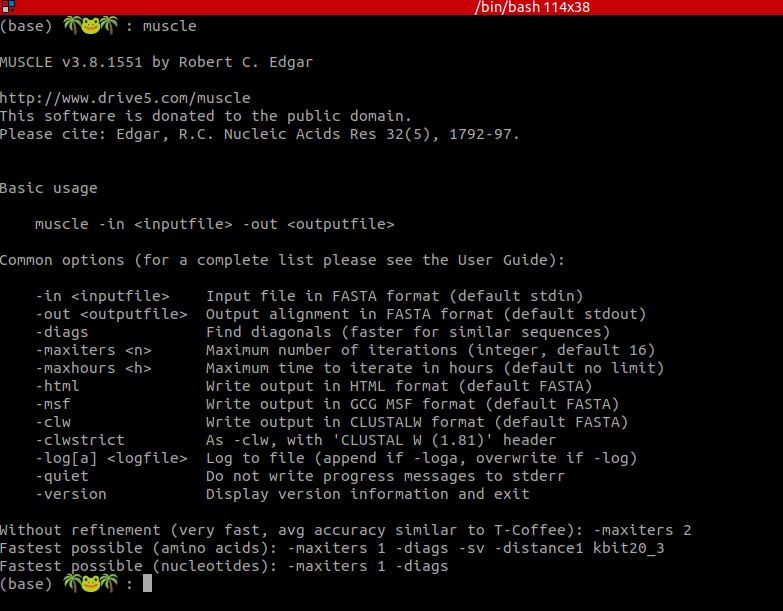

Muscle has many features which are not that relevant for us now, we just want a quick tool to align sequences and the command

muscle -in \<inputfile> -out \<outputfile> is as simple as it gets!

---

### First MSA

To create our first multiple sequence alignment I prepared a small file containing sequences (data/msaInput.fa)

Opening this file in your favourite text editor shows you a bunch of Sequences which might look similar or not to you. Let's see how similar they really are.


We process the data using muscle as follows:

muscle -in data/msaInput.fa -out data/processed/firstmsa.fa

Checking the output shows us that it inserted a good bunch of dashes everywhere. 



#### Visualisation Tool

This is pretty unsatisfying to look at so we install JalView - a cool tool for visualization

https://www.jalview.org/download/linux/

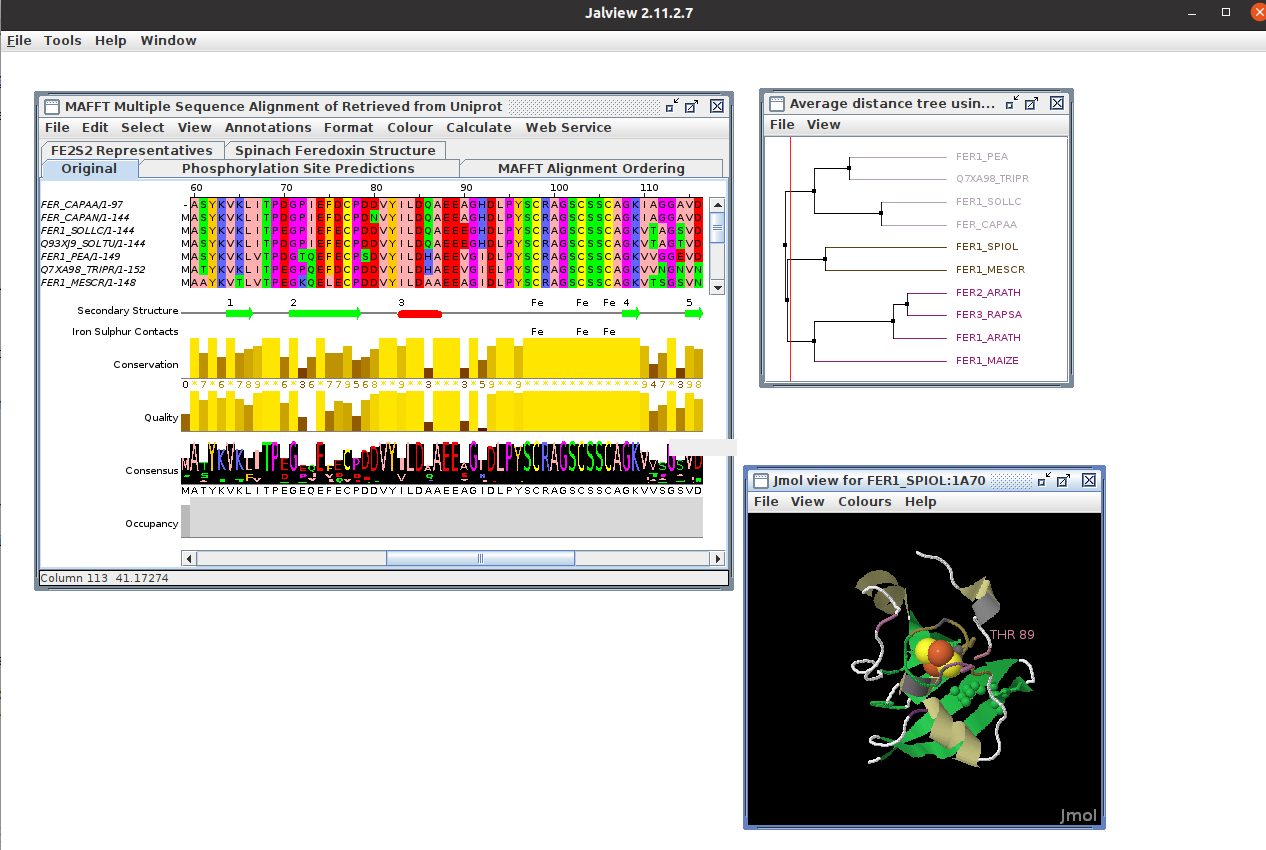


Jalview shows a bunch of default shit which you can just click away. Now lets import the msa and make it look nice

File -> input alignment -> from file -> select the generated MSA
(you can also just drag and drop the file onto jalview)


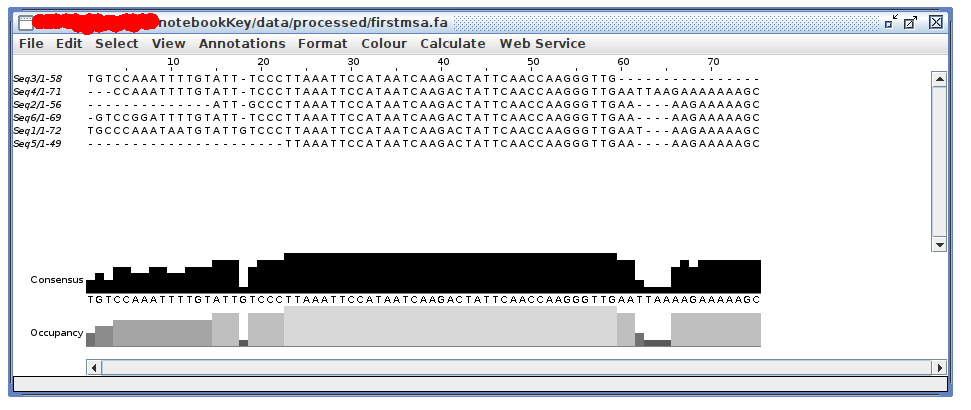

Jalview shows us all sequences with index, as well as below a consensus sequence and the occupancy of each nucleotide slot. The consensus sequence is the sequence generated by taking the most frequent occuring nucleotide in each slot, and it also gives us a percentage of how many sequences have this nucleotide at a certain index. The occupancy gives us how many nucleotides at index position are filled ("does it have many gaps")


To further make it visually appealing we can select "colour" from the menu bar and click on nucleotide (as we have a nucleotide sequence) resulting in this:

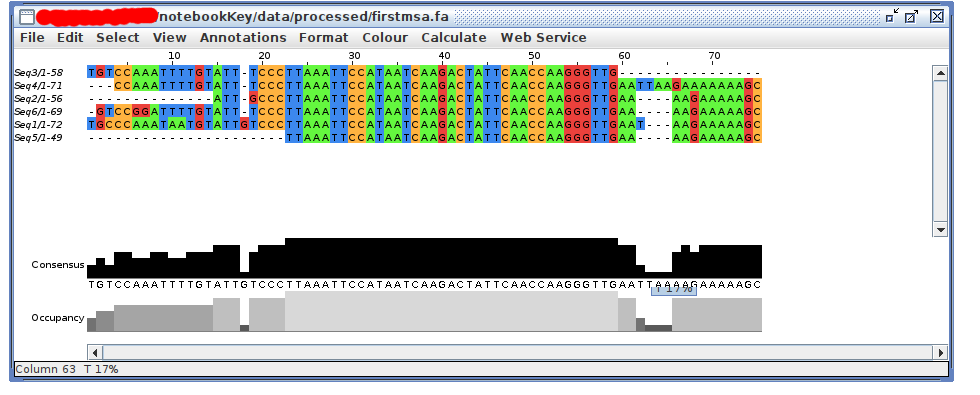


This gives us a nice visual representation and allows us to already interpret the data. Can you spot a conserved region? Can you spot mutations, insertions and deletions?

---

## Annotating Sequences

An important aspect of sequence analysis is finding out what we are actually looking at. To do so we can use a tool called [Basic Local Alignment Search Tool (BLAST)](https://blast.ncbi.nlm.nih.gov/Blast.cgi). We will be using a web version provided by NCBI, but if you know what you are looking for it is recommended to set up local database to "BLAST against".

We generate the consensus sequence (using biopython) from the MSA and compare it with the online database to find out what we are looking at.


In [4]:
# Generate Consensus Sequence

# Imports
from Bio import AlignIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment
import collections

# Read the alignment
alignment = AlignIO.read('data/processed/firstmsa.fa', 'fasta')

# Get the length of the alignment
alignment_length = alignment.get_alignment_length()

# Initialize the consensus sequence as a list of characters
consensus = []

# Iterate over each position in the alignment
for i in range(alignment_length):
    # Extract the base/residue at the current position for each sequence
    column = [seq[i] for seq in alignment]
    
    # Count the occurrence of each base/residue, ignoring gaps
    counter = collections.Counter([base for base in column if base != '-'])
    
    # Find the most common base/residue
    common_base, common_count = counter.most_common(1)[0]
    
    # Append the most common base/residue to the consensus sequence
    consensus.append(common_base)

# Join the consensus list to form the consensus sequence string
consensus_sequence = ''.join(consensus)

# Create a SeqRecord for the consensus sequence
consensus_record = SeqRecord(Seq(consensus_sequence), id='consensus', description='Consensus Sequence')

# Write the consensus sequence to a new fasta file
with open('data/processed/consensus.fa', 'w') as output_handle:
    SeqIO.write(consensus_record, output_handle, 'fasta')
    
print(consensus_record.seq)

TGTCCAAATTTTGTATTGTCCCTTAAATTCCATAATCAAGACTATTCAACCAAGGGTTGAATTAAAAGAAAAAGC


### BLAST

This is our consensus sequence and now lets BLAST it online to see what this could be!

On the [blast website](https://blast.ncbi.nlm.nih.gov/Blast.cgi) we click on [nucleotide blast](https://blast.ncbi.nlm.nih.gov/Blast.cgi?PROGRAM=blastn&PAGE_TYPE=BlastSearch&LINK_LOC=blasthome)

Paste in our sequence in fasta format inside the "Enter Query Sequence Field" and click on BLAST

This will take some time as we are using their online service. Just be patient for a bit!


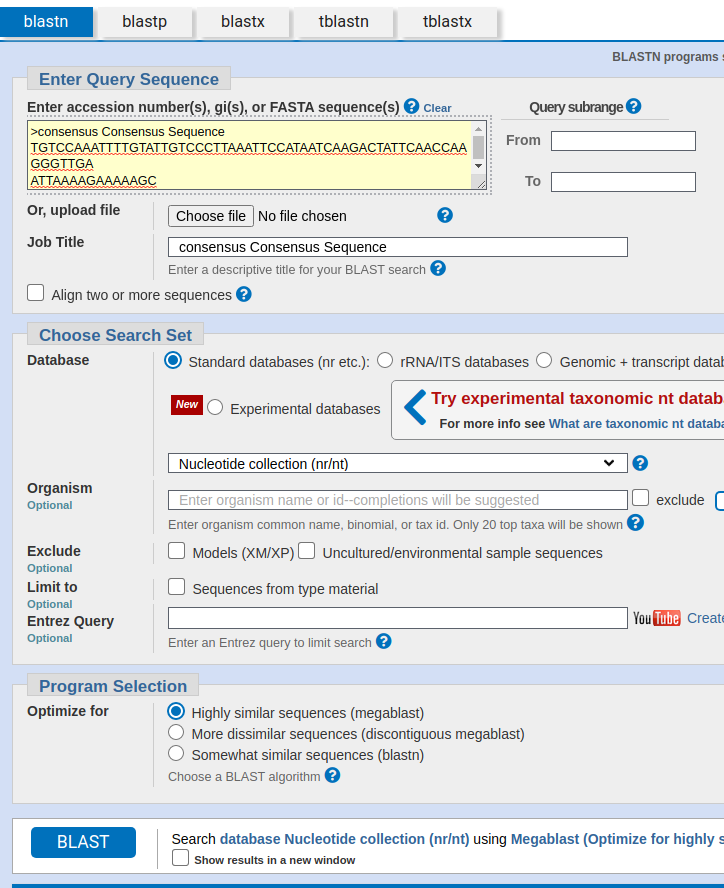


## BLAST Result

BLAST will give us all sequences this specific sequence matches to, ordered by quality of match.
We can see that this sequence we used as example belongs to the coronavirus and on the right side below the red dots we can see scores on how well it aligns as well as the Per.Identity, which is the percentage identity meaning how much % of our DNA does EXACTLY match the thing it aligned too.

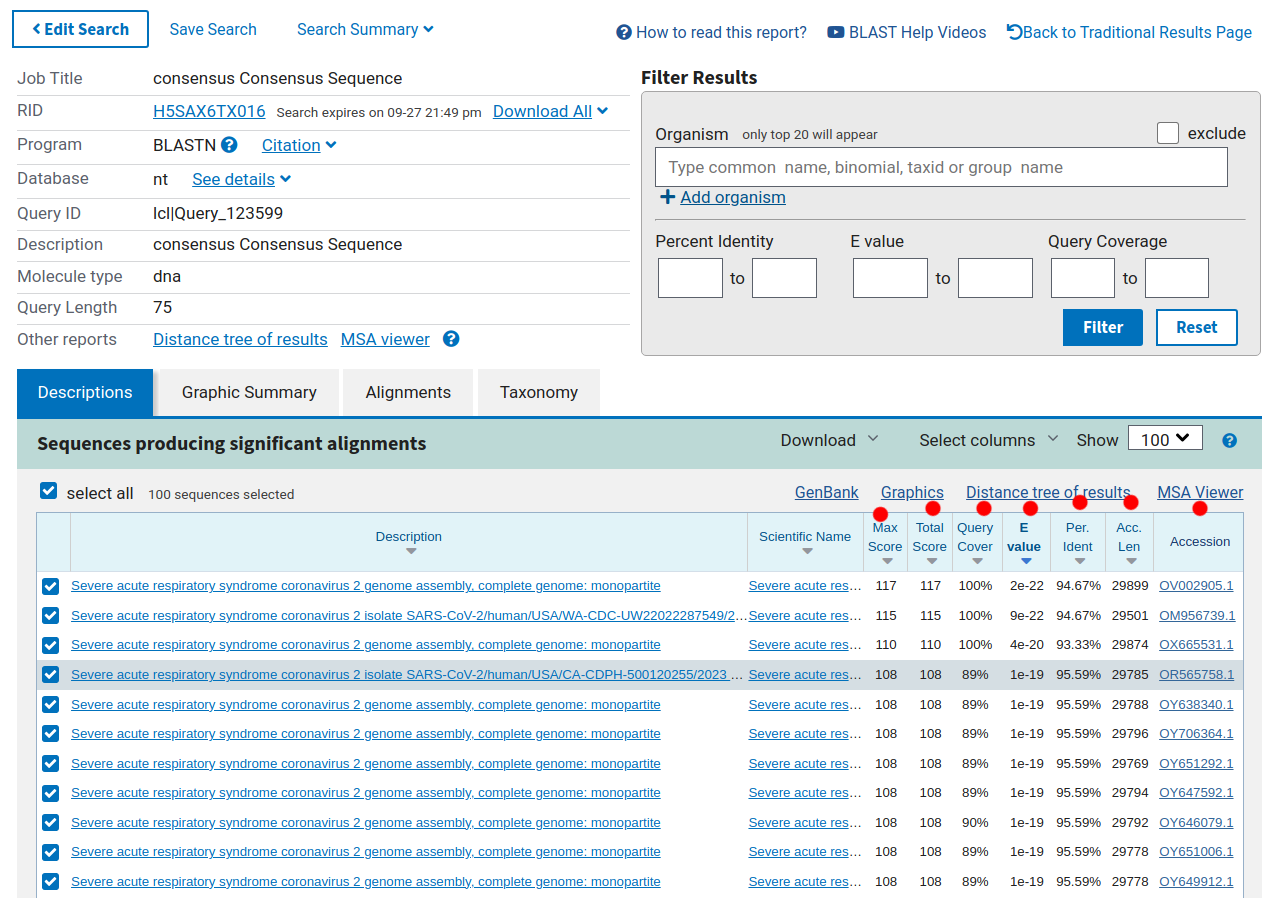

## A more interesting/in depth example with real life application

We want to explore an antimicrobial resistance (AMR) marker on Neisseria Gonorrhoeae (NG).

AMR is an everincreasing problem as more and more bacteria and fungi become resistant to antibiotics, meaning treatment options are getting limited ([not many new antibiotics lately](https://www.who.int/news-room/detail/17-01-2020-lack-of-new-antibiotics-threatens-global-efforts-to-contain-drug-resistant-infections) and increasing resistances) and diseases can cause larger harm.

An interesting example is NG, with it's associated disease gonorrhea ("the clap"), a potentially nasty sexually transmitted disease (STD). [Antimicrobial resistance in NG is increasing uncomfortably fast](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5501266/) and is thereby of some global concern. 


We start with [this paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7848993/) thats somewhat recent (2021)

Apparently a mutation called "A2059G" in the 23S rRNA gene is associated with high-level azithromycin (antibiotic) resistance. We want to explore a small variety of 23S rRNA sequences over a few years to find out if it potentially is increasing or if we can find it at all. 

**This is by no means a comprehensive large-scale analysis, it's merely a demonstration of a workflow which can lead to insights valuable for research or product development and I came up with it on the fly so don't expect to get your mind blown**

i.e. a STD test that not only detects the STD, but also to this patient specific resistances and instructions on personal treatment - which antibiotic to prescribe to this specific patient - such wow, much application, the AI revolution in pharma and personal care over the next 20 years will be a sight to behold imo

---

To start we find relevant data. We search for data from neisseria gonorrhoeae and download it

https://www.ncbi.nlm.nih.gov/nuccore/?term=txid482%5BORGN%5D+AND+(188942%5BBioproject%5D+OR+188943%5BBioproject%5D)

NCBI features 5 annotated records. Ideally you would get thousands of sequences from hospitals or research facilities or NG specific databases! I prepared more data downloading a few genbank sequences, extracting the 23s DNA part from annotation as in the code example above, and added them to the 5 annotated examples so we have atleast some data to work with. I did not check whether this newly discovered mutation is contained within so let's see :) (its little data and as it was found out more recently I doubt it will have high prevalence if contained at all in the few examples I pulled). ((Code to extract data from genbank is provided below))

The data is available 'data/ng/23sExtracted.fa'

Then we do a multiple sequence alignment to check it out visually as lots of information of quality of the data can be seen by eye.

muscle -in data/ng/23sNucleotideSequence.fa -out data/ng/23sExtractedMSA.fa

Check that out in JalView

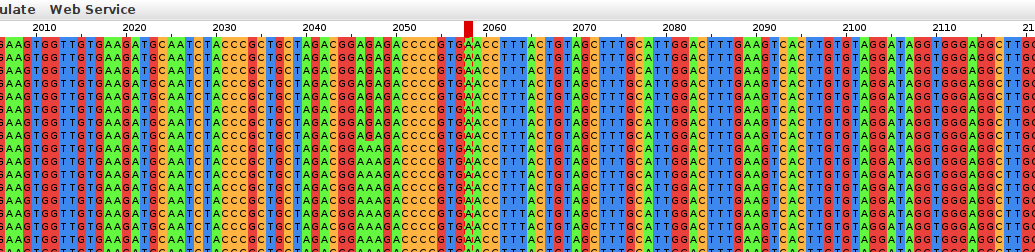


Unfortunately we can not detect the mutation A2058G (which means that the nucleotide position 2058 changed from an A to G) in this Data. 

We do see that at position 2047 such a mutation is visible and a few As were replaced by Gs. 

To check if this is an error occuring due to different numbering/processing conventions we have to consolidate literature, more data, or in the ideal case reproduce the whole data analysis from the paper (as we would have clarity on their processing as well as data that surely contains the mentioned mutation).


***I hope you came this far and enjoyed this kind of content. Please give me feedback on stuff you were stuck with or if you have any questions***

Small Exercise:
    
Tell me the translation to this nucleotide sequence to maybe win a prize (nucleotide -> protein)

ATAGCGATGGCCATGGCAGGTATCTGTATTGCGAAC

Cheerio, and remember:

## Me when my boss asks me if I received the new data already and started processing it

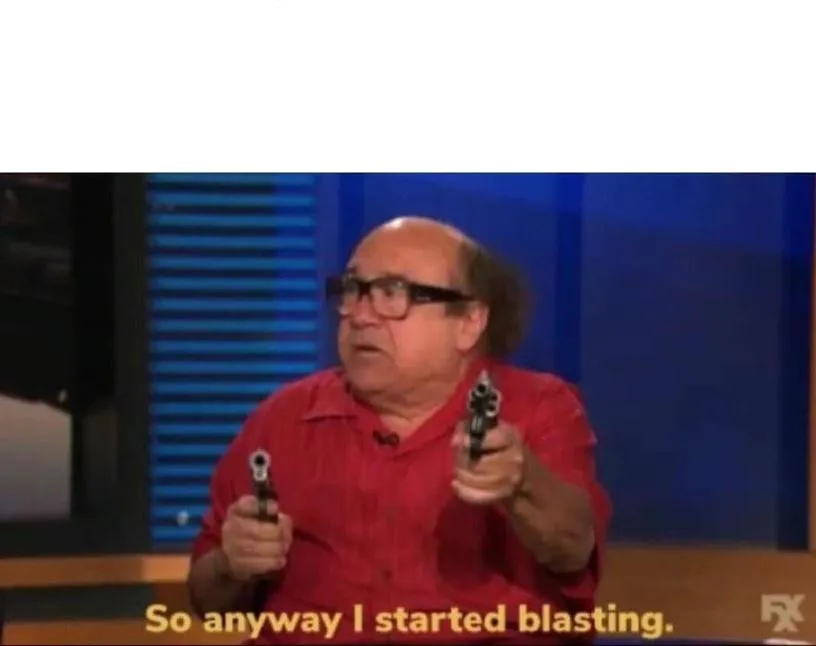

In [5]:
# Code to extract the 23s rna sequences from genbank (full) files.
# Feel free to download some data from here: https://www.ncbi.nlm.nih.gov/nuccore/?term=Neisseria+gonorrhoeae+complete+genome
# and process them yourself if you feel like it

inFile = 'data/ng/ngDownload.gb'

outFile = 'data/ng/23sExtracted.fa'

# We can set up dictionaries of features to extract
featureDict = dict()
resultDict = dict()

# Search for 23s rRNA
feature_type = 'rRNA'
feature_name = '23S ribosomal RNA'

# Initialize a list to hold the extracted sequences
extracted_sequences = []

# iterate over each record in file and write to outFile
for record in SeqIO.parse(inFile, format='gb'):
    # iterate over each feature 
    for feature in record.features:
        if feature.type == feature_type and 'product' in feature.qualifiers:
            if feature_name in feature.qualifiers['product']:
                feature_seq = feature.extract(record.seq)
                seq_record = SeqRecord(feature_seq, id=record.id, description=feature_name)
                
                # Add the SeqRecord to the list
                extracted_sequences.append(seq_record)

# Write all the extracted sequences to the output file
with open(outFile, 'w') as output_handle:
    SeqIO.write(extracted_sequences, output_handle, 'fasta')                
